Importing necessary libraries and models from different tools

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split   #for cross-validation(cv)
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error  #to check model's performance on cv data       
import matplotlib.pyplot as plt  #pictorial analysis

In [2]:
df = pd.read_csv('Desktop\Dolores-master\Dolores-master\Input data/train.csv')
df1 = pd.read_csv('Desktop\Dolores-master\Dolores-master\Input data/test.csv')

In [3]:
df.head()

,Unnamed: 0,index,id,theta1,theta2,theta3,theta4,theta5,theta6,thetad1,...,da2,da3,da4,da5,db1,db2,db3,db4,db5,target
0,0,6633,6633,1.258655,-0.929410,-0.050415,1.607280,-1.666597,-0.562623,-2.119564,...,1.900982,2.847008,1.694073,2.655953,2.560639,0.539491,1.198796,1.102964,2.200707,-0.260065
1,1,3767,3767,-0.378386,1.898102,0.137376,-2.138864,0.376567,-0.470433,-0.128412,...,2.127900,0.941831,1.008708,2.117702,0.880092,0.536593,1.338949,1.780534,1.236617,-0.204540
2,2,1224,1224,-0.611485,0.900391,-0.263779,0.021346,2.097770,0.952058,0.991799,...,1.815471,0.900659,0.703724,2.219781,2.447250,1.239661,1.288070,2.462066,2.240620,0.559202
3,3,3273,3273,2.217917,1.709197,2.421718,0.363645,2.080355,-0.869141,2.061683,...,2.618496,2.458995,0.537412,2.602852,2.632219,0.755637,2.973980,2.851321,1.028782,-0.342738
4,4,4446,4446,-2.380334,-1.426494,-1.665380,-1.018660,2.080026,3.152886,0.557293,...,1.527161,1.470630,1.060353,0.446626,2.519833,1.992571,1.263569,0.810387,1.646483,-0.703350


# Preprocessing

In [4]:
X = df.drop(columns = ['Unnamed: 0', 'index', 'id', 'target']) #droping columns which don't follow a useful trend('Unnamed: 0', 'index', 'id') and target column
y = df['target']

In [5]:
X.head()

,theta1,theta2,theta3,theta4,theta5,theta6,thetad1,thetad2,thetad3,thetad4,...,da1,da2,da3,da4,da5,db1,db2,db3,db4,db5
0,1.258655,-0.929410,-0.050415,1.607280,-1.666597,-0.562623,-2.119564,2.811831,1.187248,-0.280283,...,2.923102,1.900982,2.847008,1.694073,2.655953,2.560639,0.539491,1.198796,1.102964,2.200707
1,-0.378386,1.898102,0.137376,-2.138864,0.376567,-0.470433,-0.128412,2.422957,0.099426,1.464426,...,0.560585,2.127900,0.941831,1.008708,2.117702,0.880092,0.536593,1.338949,1.780534,1.236617
2,-0.611485,0.900391,-0.263779,0.021346,2.097770,0.952058,0.991799,-0.357290,-2.077107,0.863809,...,3.046672,1.815471,0.900659,0.703724,2.219781,2.447250,1.239661,1.288070,2.462066,2.240620
3,2.217917,1.709197,2.421718,0.363645,2.080355,-0.869141,2.061683,0.293324,-0.419036,1.459497,...,1.879936,2.618496,2.458995,0.537412,2.602852,2.632219,0.755637,2.973980,2.851321,1.028782
4,-2.380334,-1.426494,-1.665380,-1.018660,2.080026,3.152886,0.557293,0.058471,-0.058549,-1.015758,...,1.202644,1.527161,1.470630,1.060353,0.446626,2.519833,1.992571,1.263569,0.810387,1.646483


In [6]:
X.isnull().sum().sum() #No columns have null values

0

In [7]:
y.head()

0   -0.260065
1   -0.204540
2    0.559202
3   -0.342738
4   -0.703350
Name: target, dtype: float64

In [8]:
X_test = df1.drop(columns = ['Unnamed: 0', 'index', 'id']) #Same as in case of training data, test data is cleaned to have useful features

In [9]:
X_test.head()

,theta1,theta2,theta3,theta4,theta5,theta6,thetad1,thetad2,thetad3,thetad4,...,da1,da2,da3,da4,da5,db1,db2,db3,db4,db5
0,2.533249,-0.792764,-2.177767,-1.110612,-1.273932,-0.228057,-1.043535,3.537794,-0.429972,1.053080,...,1.290247,1.557358,0.561434,2.746378,2.916253,1.432392,-0.040619,2.225802,2.418217,1.705286
1,-1.157607,0.815686,2.410577,-0.321521,-0.579014,-1.047877,1.708049,-1.243202,2.274981,-1.122352,...,1.816308,2.367484,2.088922,1.402735,1.889066,1.351893,2.437513,2.875317,2.363191,1.400312
2,0.817617,1.775667,-1.579402,-0.943133,0.571878,-1.158937,1.794551,2.464161,-2.728984,1.716588,...,1.401952,1.392231,0.432919,1.921923,1.573775,1.104550,1.097384,1.959356,0.114303,2.600579
3,1.942009,2.897571,-0.833998,-0.868103,-0.747734,2.151514,-0.450202,-0.302839,1.761965,-0.716203,...,1.994579,1.729033,2.381447,2.300106,0.014986,2.641325,1.581736,0.960167,1.542038,1.231497
4,-0.691687,0.389034,-0.573441,-0.652371,0.645799,0.078332,-1.618586,-0.313952,2.273147,1.895342,...,1.341282,1.774178,1.969909,0.879087,1.592115,2.701025,1.652432,0.397457,1.933247,1.084829


# Simple Visualization

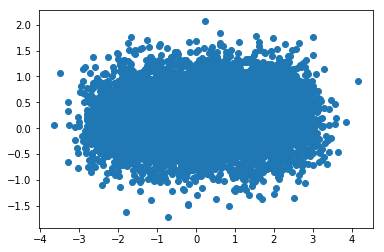

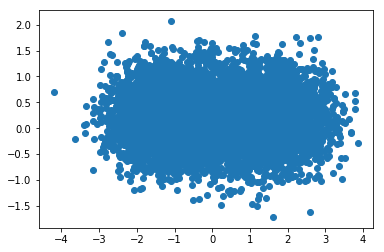

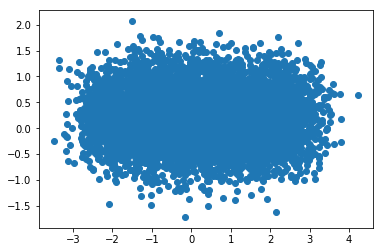

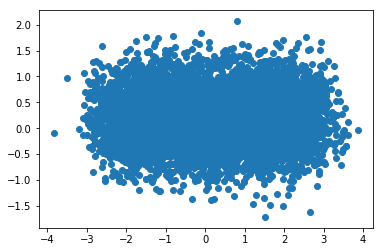

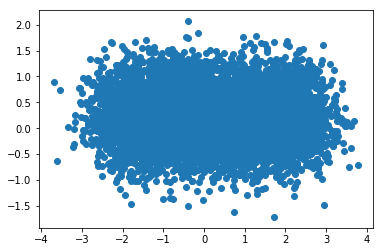

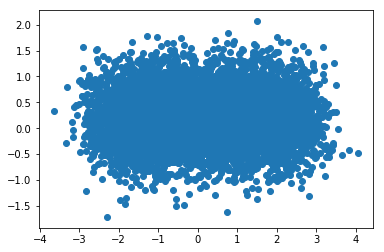

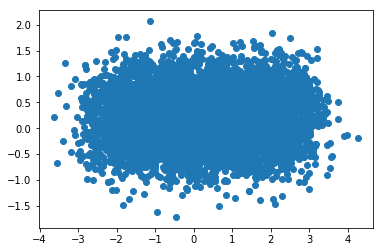

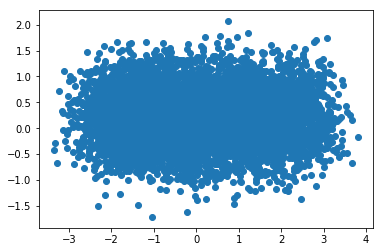

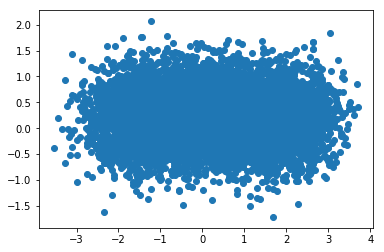

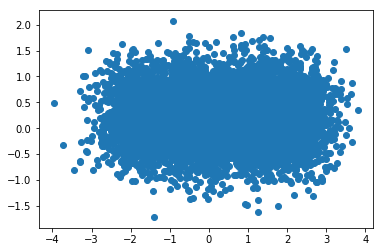

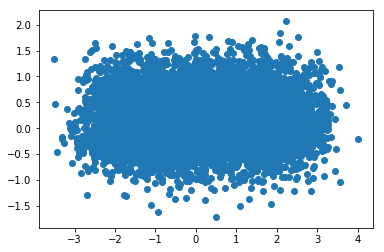

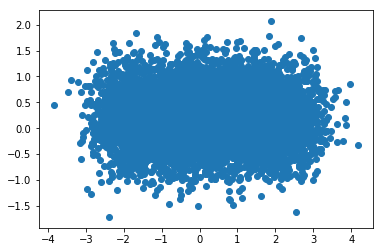

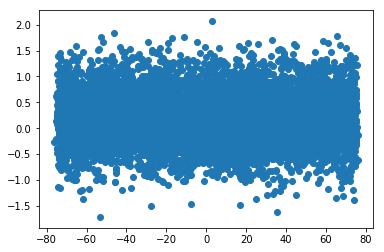

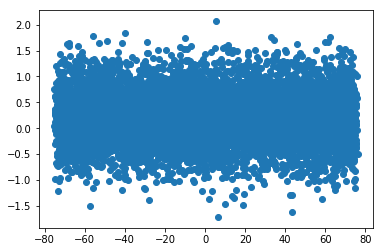

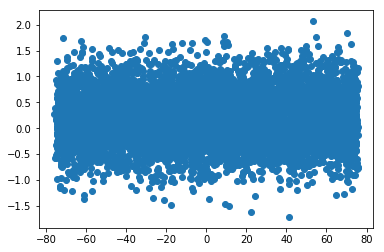

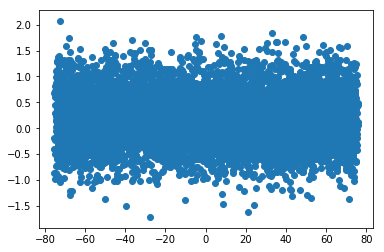

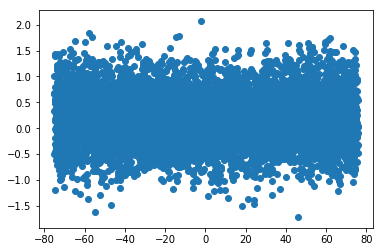

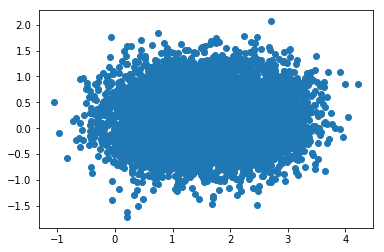

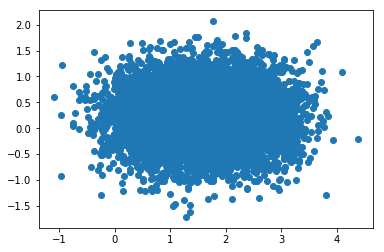

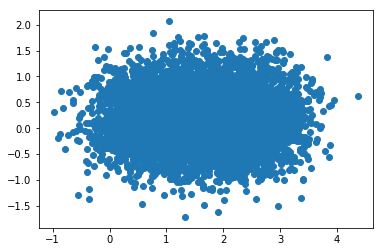

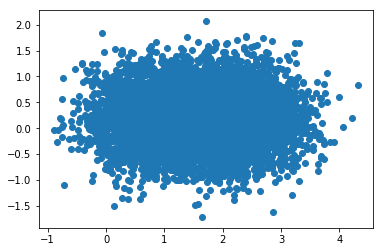

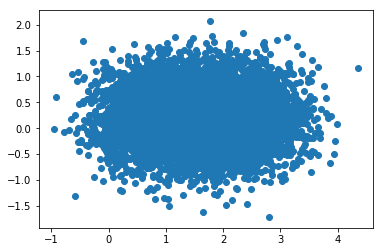

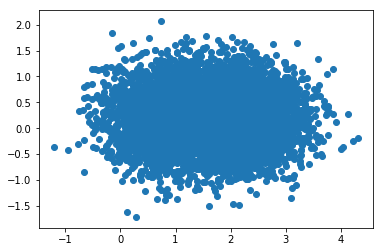

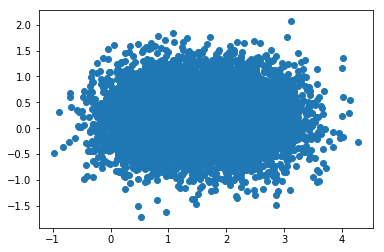

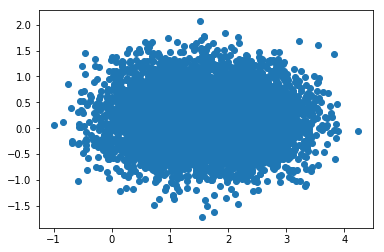

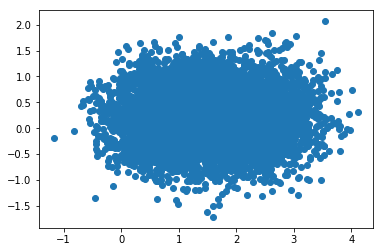

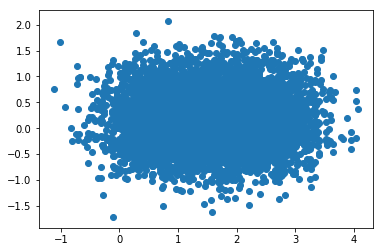

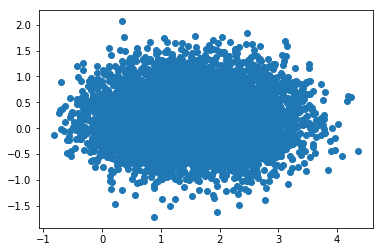

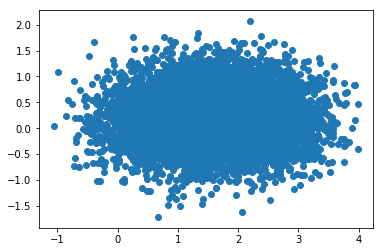

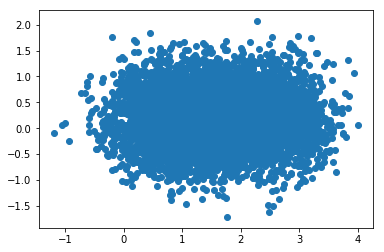

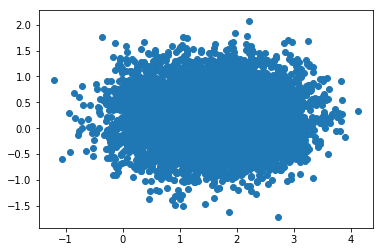

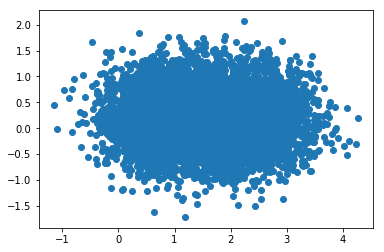

In [10]:
for i in X:
    plt.scatter(X[i], y)
    plt.show()

Looking at the above scatter plots, it is easily inferable that a linear model is of no use.
Tree based models(like: RF, GBM or Xgboost) is the best option here as they also prevent overfitting in most cases.

# Cross-validation

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 

In [12]:
gbm = GradientBoostingRegressor(n_estimators = 100, max_features = 'sqrt')  #not much hyperparameter tuning is used in both models
xgb = XGBRegressor(n_estimators = 100, max_featuers = 'sqrt') 
gbm.fit(x_train, y_train)
xgb.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:38:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, max_featuers='sqrt', min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [13]:
y_cv = 0.4*gbm.predict(x_test) + 0.6*xgb.predict(x_test)  #random initialization of percentage of prediction contributed by the 2 models(literally no tuning was done to find the percentage of contribution by each model)

In [14]:
rmse = np.sqrt(mean_squared_error(y_cv, y_test))
print(rmse) #one of the best rmse which was found after testing with many other models

0.5015142230364058


# model selection and fitting

In [15]:
gbm.fit(X, y)
xgb.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:38:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, max_featuers='sqrt', min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [16]:
y_pred_true = 0.4*gbm.predict(X_test) + 0.6*xgb.predict(X_test) 

In [17]:
submission = pd.DataFrame({'': df1['Unnamed: 0'], 'id': df1['id'], 'target': y_pred_true})

In [18]:
submission.head()

,,id,target
0,0,2133,0.203773
1,1,6389,0.223292
2,2,4496,0.205503
3,3,2400,0.179626
4,4,4519,0.188087


In [19]:
submission.to_csv('Dolores.csv', index = False)